# NUMERICAL COMPUTING PROJECT


## Stock Price Analysis and Prediction
This notebook demonstrates the process of extracting, analyzing, visualizing, and predicting stock prices for Apple Inc. (AAPL) using various Python libraries.

### Import Libraries

This section imports all the necessary libraries used throughout the notebook. These libraries include yfinance for data extraction, pandas for data manipulation, sklearn for machine learning tasks, numpy for numerical operations, and matplotlib for data visualization.

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

### Data Extraction
This section of the code uses the `yfinance` library to download historical stock prices for Apple Inc. (AAPL) from Yahoo Finance. The data is fetched from January 1, 2000, to December 30, 2023, and then saved to a CSV file for later use.

In [10]:
start_date = '2000-01-01'
end_date = '2023-12-30'
ticker = 'AAPL'
data = yf.download(ticker, start=start_date, end=end_date)
data.to_csv('historical_stock_prices.csv')

[*********************100%%**********************]  1 of 1 completed


### Load and Preprocess Data
Here, the code loads the saved CSV file into a pandas DataFrame. It then converts the 'Date' column to datetime format and sets it as the index. The data is sorted by date and any missing values are filled using forward fill method.

In [12]:
data = pd.read_csv('historical_stock_prices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sort_index()
data = data.ffill()

### Calculate Velocity and Acceleration
In this part, the code calculates the velocity (rate of change) and acceleration (second derivative) of the stock's closing price. The velocity is calculated as the difference between consecutive closing prices, and the acceleration is calculated as the difference between consecutive velocities.

In [13]:
data['Velocity'] = data['Close'].diff()
data['Acceleration'] = data['Velocity'].diff()


### Visualization
This section creates visualizations for the stock's closing price, velocity, and acceleration. It uses Matplotlib to plot these three metrics in separate subplots for better visualization and understanding.

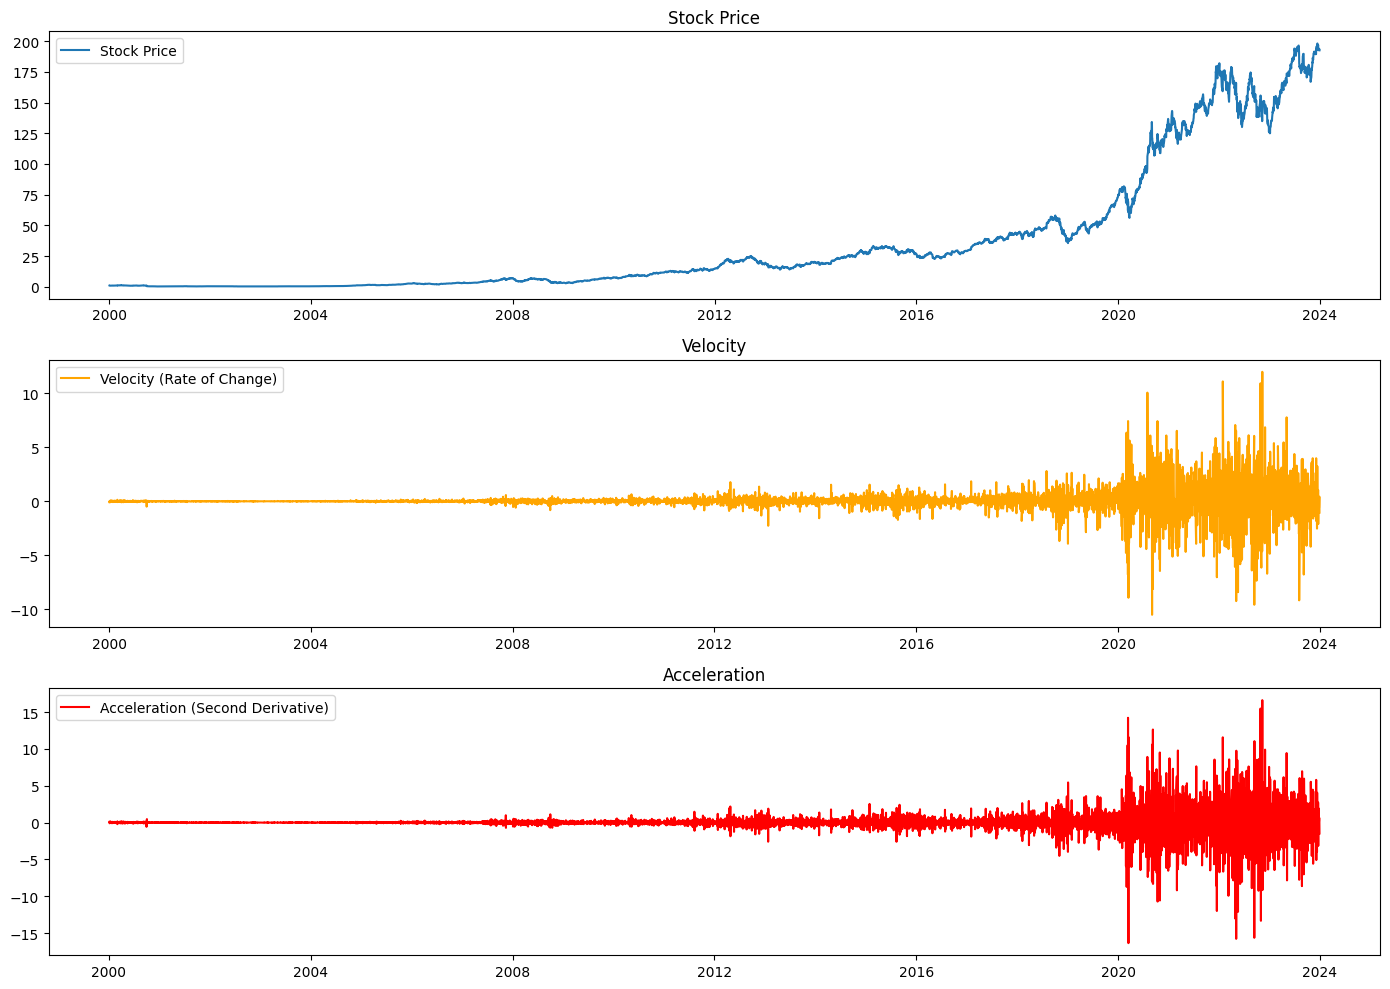

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(14, 10))
axs[0].plot(data.index, data['Close'], label='Stock Price')
axs[0].set_title('Stock Price')
axs[0].legend()
axs[1].plot(data.index, data['Velocity'], label='Velocity (Rate of Change)', color='orange')
axs[1].set_title('Velocity')
axs[1].legend()
axs[2].plot(data.index, data['Acceleration'], label='Acceleration (Second Derivative)', color='red')
axs[2].set_title('Acceleration')
axs[2].legend()
plt.tight_layout()
plt.show()

### Moving Averages
This part calculates the moving average of the stock's closing price using a 10-day window. It also computes the velocity and acceleration of the moving average. The code then visualizes these metrics in separate subplots.

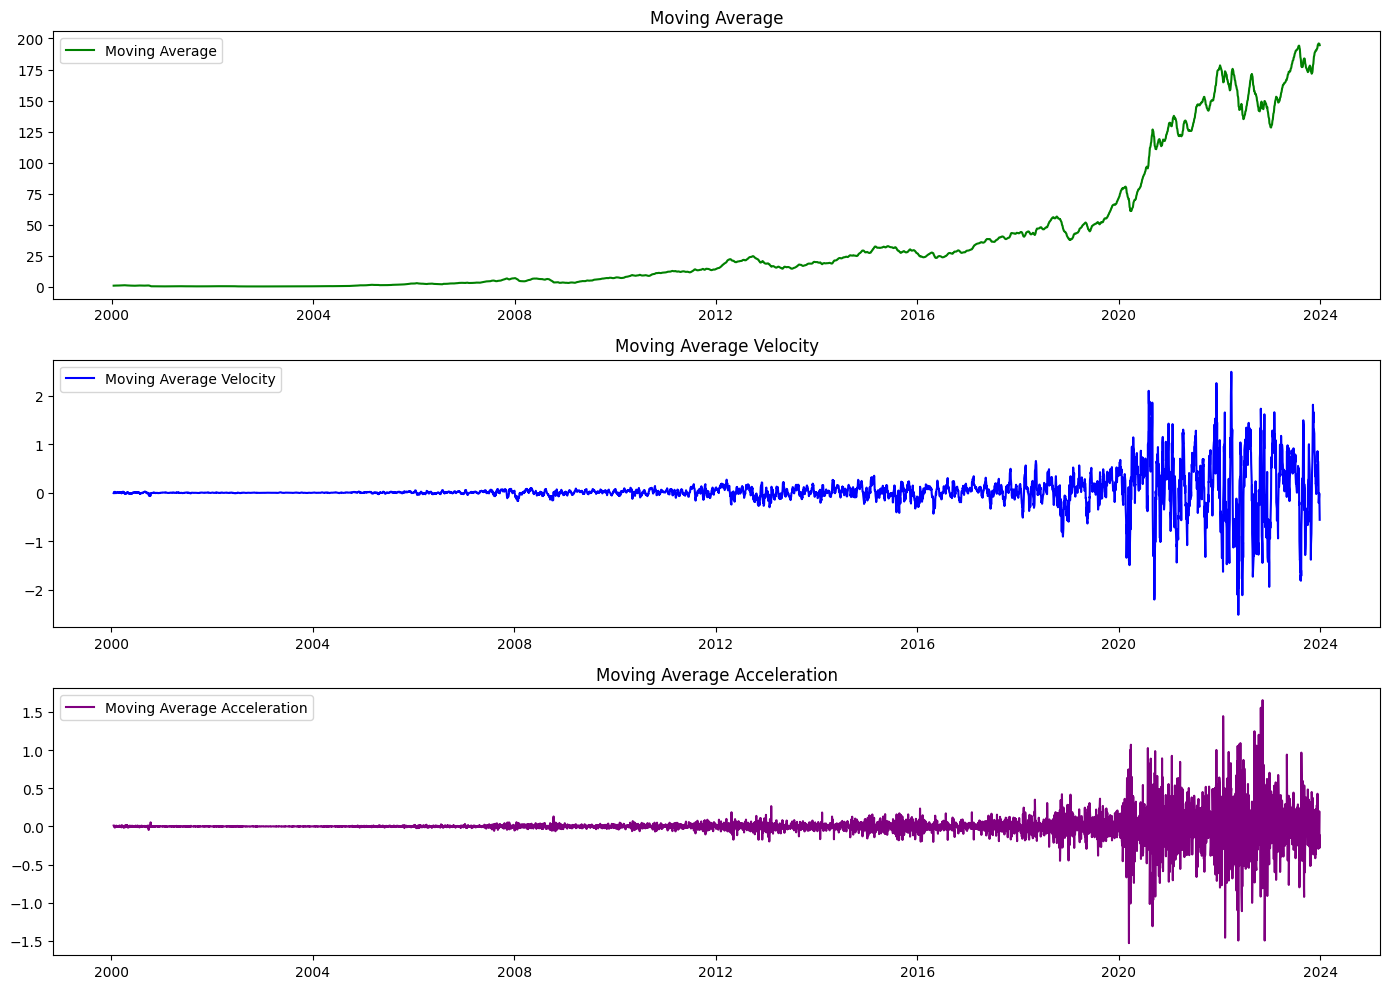

In [15]:
data['Moving Average'] = data['Close'].rolling(window=10).mean()
fig, axs = plt.subplots(3, 1, figsize=(14, 10))
axs[0].plot(data.index, data['Moving Average'], label='Moving Average', color='green')
axs[0].set_title('Moving Average')
axs[0].legend()
data['Moving Average Velocity'] = data['Moving Average'].diff()
axs[1].plot(data.index, data['Moving Average Velocity'], label='Moving Average Velocity', color='blue')
axs[1].set_title('Moving Average Velocity')
axs[1].legend()
data['Moving Average Acceleration'] = data['Moving Average Velocity'].diff()
axs[2].plot(data.index, data['Moving Average Acceleration'], label='Moving Average Acceleration', color='purple')
axs[2].set_title('Moving Average Acceleration')
axs[2].legend()
plt.tight_layout()
plt.show()


## Feature Engineering
This section creates new features from the date index. It maps the index to timestamps and extracts the year, month, and day. These features are useful for the machine learning model to understand time-related patterns in the data.

In [17]:
data['Timestamp'] = data.index.map(pd.Timestamp.timestamp)
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data = data.dropna()


## Split the Data
Here, the code splits the dataset into features (X) and target variable (y). The features include the timestamp, year, month, day, and moving average. The target variable is the closing price. The data is then split into training and testing sets, with 80% of the data used for training and 20% for testing.

In [18]:
X = data[['Timestamp', 'Year', 'Month', 'Day', 'Moving Average']].values
y = data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Train the Model
This section trains a linear regression model using the training data. The model learns the relationship between the features and the target variable (closing price).



In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict with the Model
Once the model is trained, it is used to make predictions on the entire dataset. The predicted prices are stored in a new column called 'Predicted'. Additionally, the model predicts prices on the test set for evaluation purposes.

In [21]:
data['Predicted'] = model.predict(X)
y_pred = model.predict(X_test)

## Calculate RMSE
The Root Mean Squared Error (RMSE) is calculated to evaluate the performance of the model. RMSE is a commonly used metric that measures the average magnitude of the errors between predicted and actual values.

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.9257114622301743


## Visualize Actual vs Predicted Data
This section visualizes the actual and predicted stock prices on a plot. The actual prices are shown with a solid line, while the predicted prices are shown with a dashed line. This visualization helps in understanding how well the model performs.

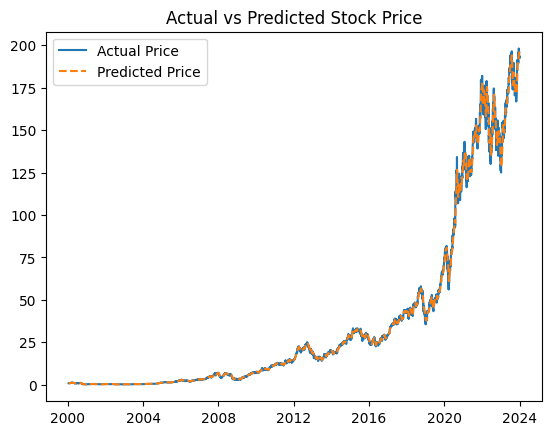

In [23]:
plt.plot(data.index, data['Close'], label='Actual Price')
plt.plot(data.index, data['Predicted'], label='Predicted Price', linestyle='--')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.show()

## Conclusion
In this project, we successfully extracted, analyzed, and predicted the stock prices of Apple Inc. (AAPL) using historical data from 2000 to 2023. We performed various tasks including data extraction, preprocessing, feature engineering, visualization, and model training. By calculating velocity and acceleration, we gained insights into the rate of change and trend patterns of stock prices. We then utilized a linear regression model to predict future prices and evaluated its performance using the Root Mean Squared Error (RMSE) metric.

The project demonstrates the application of machine learning techniques in financial data analysis and prediction. It showcases the importance of feature engineering and visualization in understanding and predicting stock market trends.

We would like to express our heartfelt gratitude to Ms. Iqra Iqbal, the Teaching Assistant of Numerical Computing, for her guidance and support throughout this project. We also extend our sincere thanks to Professor Awais Shoukat for providing us with the opportunity to work on this project and for his invaluable insights into numerical computing.

Thank you for your continuous support and encouragement.